In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

GE = pd.read_csv("../data/LINCSL1000/LINCSL1000_processed.csv.gz", compression="gzip")
GE = GE.groupby("Standardized_SMILES").median().reset_index()
GE

,Standardized_SMILES,200814_at,222103_at,201453_x_at,204131_s_at,200059_s_at,205067_at,213702_x_at,214435_x_at,201334_s_at,...,204662_at,203047_at,203343_at,217995_at,218450_at,212536_at,218529_at,211071_s_at,203341_at,205379_at
0,BrC1C(Br)C(Br)C(Br)C(Br)C1Br,0.0038,0.0004,0.0110,0.0218,-0.0128,0.0254,-0.0101,0.0038,-0.0036,...,0.0356,-0.0001,0.0276,-0.0171,-0.0177,0.0045,-0.0184,0.0627,0.0138,0.0338
1,Brc1c(Br)c(Br)c2[n-]nnc2c1Br,-0.0120,0.0001,0.0023,0.0058,0.0004,-0.0113,0.0309,-0.0165,0.0374,...,0.0046,0.0200,0.0035,-0.0291,0.0092,-0.0458,0.0250,0.0808,-0.0270,0.0080
2,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12,0.0144,-0.0014,0.0032,-0.0427,-0.0071,-0.0183,-0.0070,0.0207,-0.0095,...,0.0201,0.0249,0.0168,0.0269,-0.0321,0.0142,-0.0254,-0.0062,0.0340,0.0529
3,Brc1cc2c(cc1C1[NH2+]c3ccccc3C3C=CCC31)OCO2,0.0024,-0.0377,-0.0087,0.0091,-0.0110,0.0037,-0.0008,-0.0021,0.0929,...,-0.0094,-0.0002,-0.1535,-0.0015,-0.0260,-0.0430,-0.0128,0.0506,0.0055,0.0126
4,Brc1ccc(-c2csc(N3CCC(c4nn[n-]n4)CC3)n2)cc1,0.0084,0.0112,0.0100,0.0417,-0.0159,-0.0228,-0.0049,0.0196,0.0106,...,-0.0266,0.0018,0.0299,-0.0302,0.0227,-0.0214,0.0110,-0.0825,0.0090,-0.0132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,c1nc(=NCc2ccc3c(c2)OCO3)c2cc(-c3ccoc3)ccc2[n-]1,0.0322,-0.0079,0.0007,0.0034,0.0379,-0.0535,-0.0118,-0.0109,0.0404,...,-0.0108,-0.0545,-0.0074,0.0218,0.0969,0.0461,-0.0573,-0.0407,0.0215,-0.0254
9128,c1nc(CC2CC[NH2+]CC2)c[n-]1,0.0245,0.0131,0.0150,-0.0052,0.0257,-0.0836,0.0003,-0.0081,0.1193,...,-0.0055,-0.0594,0.0011,-0.0217,-0.0289,0.0066,-0.0499,0.0158,0.0142,-0.0075
9129,c1nc(CCCC2CC[NH2+]CC2)c[n-]1,0.0087,0.0099,0.0162,-0.0180,0.0158,0.0123,-0.0021,0.0160,0.0076,...,0.0064,-0.0313,0.0367,-0.0154,0.0142,0.0098,-0.0120,-0.0243,-0.0347,-0.0491
9130,c1nc2[n-]c(=Nc3ccc(N4CCOCC4)cc3)[n-]c(=NC3CCCC...,0.0123,0.0155,0.0074,0.0048,0.0331,-0.0099,0.0103,0.0212,0.0268,...,-0.0401,-0.0031,0.0062,-0.0099,0.0135,-0.0033,-0.0680,0.0270,-0.0071,-0.0208


In [2]:
GE.Standardized_SMILES.nunique()

9132

In [3]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [4]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(GE, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,200814_at,222103_at,201453_x_at,...,204662_at,203047_at,203343_at,217995_at,218450_at,212536_at,218529_at,211071_s_at,203341_at,205379_at
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,-0.00480,-0.03930,0.0007,...,-0.0022,0.0387,-0.01140,-0.0192,-0.0131,0.0122,0.0035,-0.03570,0.00920,-0.0287
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,-0.00940,-0.02240,-0.0172,...,-0.0330,0.0130,-0.04330,0.0039,0.0290,0.0329,-0.0063,-0.01800,0.00440,-0.0259
2,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,-0.00610,-0.00900,-0.0003,...,-0.0094,0.1106,-0.03960,-0.0367,-0.0505,0.0259,0.0558,0.01280,0.00670,0.0160
3,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,-0.03160,0.02250,0.0032,...,0.0233,-0.0098,-0.02100,-0.0013,0.0571,0.0390,0.0500,0.01050,-0.01500,0.0066
4,ketoprofen,ketoprofen,ketoprofen,most,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,-0.00995,0.00275,-0.0122,...,-0.0332,0.0130,0.00295,0.0151,0.0077,0.0019,-0.0061,-0.01575,-0.00515,0.0153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0.00360,-0.01930,-0.0193,...,-0.0305,0.0044,0.02120,0.0233,0.0542,-0.0820,-0.0048,0.01860,-0.01350,0.0148
546,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,0.01710,0.02260,-0.0198,...,-0.0315,0.0371,-0.01400,-0.0081,0.0493,-0.0524,-0.0216,-0.00420,-0.00300,0.0251
547,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,-0.00770,-0.00790,-0.0147,...,0.0055,-0.0105,0.00300,0.0110,-0.0387,-0.0239,-0.0278,0.02360,-0.01980,-0.0225
548,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,-0.05950,0.01340,0.0095,...,-0.0873,0.0129,0.02010,-0.0243,0.0256,-0.0500,-0.0353,-0.03140,-0.05730,0.0010


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
df = merged_df
results = []

for label in GE.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2. Chi-squared Test

    # Create a contingency table
    contingency_table = pd.crosstab(df["DICT _ Concern"], df[label])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #Store results
    label_proportions = df[label].mean()
    results.append({
        'Label': label,
        'Proportion': label_proportions,
        'Chi2 value': chi2,
        'P value': p
    })

results_df = pd.DataFrame(results)
results_df


Proportion of 200814_at
Proportion of 222103_at
Proportion of 201453_x_at
Proportion of 204131_s_at
Proportion of 200059_s_at
Proportion of 205067_at
Proportion of 213702_x_at
Proportion of 214435_x_at
Proportion of 201334_s_at
Proportion of 213721_at
Proportion of 202627_s_at
Proportion of 217478_s_at
Proportion of 206254_at
Proportion of 200602_at
Proportion of 205581_s_at
Proportion of 206562_s_at
Proportion of 205897_at
Proportion of 203135_at
Proportion of 204531_s_at
Proportion of 200882_s_at
Proportion of 206501_x_at
Proportion of 207199_at
Proportion of 209572_s_at
Proportion of 203110_at
Proportion of 201841_s_at
Proportion of 204297_at
Proportion of 209682_at
Proportion of 206752_s_at
Proportion of 209747_at
Proportion of 204061_at
Proportion of 208711_s_at
Proportion of 214062_x_at
Proportion of 207034_s_at
Proportion of 204369_at
Proportion of 200081_s_at
Proportion of 203277_at
Proportion of 212287_at
Proportion of 213191_at
Proportion of 218995_s_at
Proportion of 201471_s

Proportion of 203167_at
Proportion of 205036_at
Proportion of 202797_at
Proportion of 202396_at
Proportion of 201985_at
Proportion of 215116_s_at
Proportion of 202887_s_at
Proportion of 205633_s_at
Proportion of 200816_s_at
Proportion of 201896_s_at
Proportion of 202689_at
Proportion of 201519_at
Proportion of 209213_at
Proportion of 202545_at
Proportion of 201466_s_at
Proportion of 217766_s_at
Proportion of 201825_s_at
Proportion of 208763_s_at
Proportion of 204654_s_at
Proportion of 218149_s_at
Proportion of 202261_at
Proportion of 201561_s_at
Proportion of 203218_at
Proportion of 202868_s_at
Proportion of 201146_at
Proportion of 201032_at
Proportion of 202916_s_at
Proportion of 212180_at
Proportion of 203521_s_at
Proportion of 208647_at
Proportion of 201391_at
Proportion of 202678_at
Proportion of 203208_s_at
Proportion of 201899_s_at
Proportion of 202891_at
Proportion of 205691_at
Proportion of 201314_at
Proportion of 202394_s_at
Proportion of 213669_at
Proportion of 202696_at
Prop

Proportion of 209015_s_at
Proportion of 221750_at
Proportion of 212458_at
Proportion of 202889_x_at
Proportion of 219270_at
Proportion of 200981_x_at
Proportion of 218104_at
Proportion of 219711_at
Proportion of 213419_at
Proportion of 212047_s_at
Proportion of 211758_x_at
Proportion of 212399_s_at
Proportion of 221741_s_at
Proportion of 211747_s_at
Proportion of 202778_s_at
Proportion of 218743_at
Proportion of 205452_at
Proportion of 210416_s_at
Proportion of 204617_s_at
Proportion of 212894_at
Proportion of 212485_at
Proportion of 221482_s_at
Proportion of 34408_at
Proportion of 89476_r_at
Proportion of 215884_s_at
Proportion of 203301_s_at
Proportion of 204809_at
Proportion of 218794_s_at
Proportion of 219127_at
Proportion of 204542_at
Proportion of 208847_s_at
Proportion of 218193_s_at
Proportion of 204788_s_at
Proportion of 221732_at
Proportion of 217080_s_at
Proportion of 205172_x_at
Proportion of 205450_at
Proportion of 206571_s_at
Proportion of 203117_s_at
Proportion of 204517

,Label,Proportion,Chi2 value,P value
0,200814_at,-0.001270,789.587028,0.537528
1,222103_at,0.001233,894.072538,0.328255
2,201453_x_at,-0.000794,714.152804,0.327496
3,204131_s_at,0.006869,884.255681,0.151705
4,200059_s_at,0.001331,839.656380,0.243484
...,...,...,...,...
973,212536_at,-0.002252,912.439679,0.433851
974,218529_at,-0.004168,915.854453,0.402719
975,211071_s_at,0.001039,859.291085,0.481159
976,203341_at,-0.003931,899.619648,0.350066


In [6]:
results_df["Chi2 value" ] = results_df["Chi2 value"].astype(float)
results_df = results_df.sort_values("Chi2 value", ascending=False)
results_df

,Label,Proportion,Chi2 value,P value
671,202889_x_at,0.005202,978.008490,0.303371
137,205153_s_at,0.000240,977.102977,0.263946
758,217809_at,-0.003956,971.919739,0.287719
860,218316_at,-0.007044,968.231972,0.240100
845,222217_s_at,0.000363,965.075140,0.342701
...,...,...,...,...
369,201314_at,0.000943,711.792496,0.599607
415,200895_s_at,-0.003742,707.534408,0.768614
435,202602_s_at,-0.001099,685.276417,0.740901
34,200081_s_at,-0.002281,678.178216,0.322998


<Figure size 2400x1800 with 0 Axes>

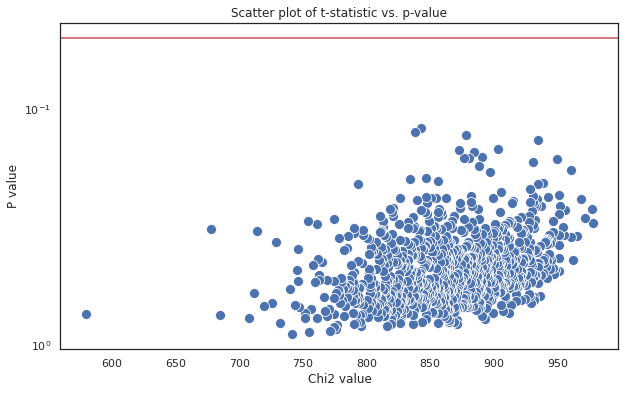

In [7]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Chi2 value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.savefig(f'SIDER_fractions_chisquare_comparison.png', bbox_inches='tight')
plt.show()
           

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
df = merged_df
results = []

for label in GE.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2. Chi-squared Test

    # Create a contingency table
    contingency_table = pd.crosstab(df["DICTrank"], df[label])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #Store results
    label_proportions = df[label].mean()
    results.append({
        'Label': label,
        'Proportion': label_proportions,
        'Chi2 value': chi2,
        'P value': p
    })

results_df = pd.DataFrame(results)
results_df


Proportion of 200814_at
Proportion of 222103_at
Proportion of 201453_x_at
Proportion of 204131_s_at
Proportion of 200059_s_at
Proportion of 205067_at
Proportion of 213702_x_at
Proportion of 214435_x_at
Proportion of 201334_s_at
Proportion of 213721_at
Proportion of 202627_s_at
Proportion of 217478_s_at
Proportion of 206254_at
Proportion of 200602_at
Proportion of 205581_s_at
Proportion of 206562_s_at
Proportion of 205897_at
Proportion of 203135_at
Proportion of 204531_s_at
Proportion of 200882_s_at
Proportion of 206501_x_at
Proportion of 207199_at
Proportion of 209572_s_at
Proportion of 203110_at
Proportion of 201841_s_at
Proportion of 204297_at
Proportion of 209682_at
Proportion of 206752_s_at
Proportion of 209747_at
Proportion of 204061_at
Proportion of 208711_s_at
Proportion of 214062_x_at
Proportion of 207034_s_at
Proportion of 204369_at
Proportion of 200081_s_at
Proportion of 203277_at
Proportion of 212287_at
Proportion of 213191_at
Proportion of 218995_s_at
Proportion of 201471_s

Proportion of 201270_x_at
Proportion of 202540_s_at
Proportion of 202433_at
Proportion of 203167_at
Proportion of 205036_at
Proportion of 202797_at
Proportion of 202396_at
Proportion of 201985_at
Proportion of 215116_s_at
Proportion of 202887_s_at
Proportion of 205633_s_at
Proportion of 200816_s_at
Proportion of 201896_s_at
Proportion of 202689_at
Proportion of 201519_at
Proportion of 209213_at
Proportion of 202545_at
Proportion of 201466_s_at
Proportion of 217766_s_at
Proportion of 201825_s_at
Proportion of 208763_s_at
Proportion of 204654_s_at
Proportion of 218149_s_at
Proportion of 202261_at
Proportion of 201561_s_at
Proportion of 203218_at
Proportion of 202868_s_at
Proportion of 201146_at
Proportion of 201032_at
Proportion of 202916_s_at
Proportion of 212180_at
Proportion of 203521_s_at
Proportion of 208647_at
Proportion of 201391_at
Proportion of 202678_at
Proportion of 203208_s_at
Proportion of 201899_s_at
Proportion of 202891_at
Proportion of 205691_at
Proportion of 201314_at
Pr

Proportion of 209029_at
Proportion of 218034_at
Proportion of 218375_at
Proportion of 200621_at
Proportion of 219051_x_at
Proportion of 203054_s_at
Proportion of 212997_s_at
Proportion of 212795_at
Proportion of 209015_s_at
Proportion of 221750_at
Proportion of 212458_at
Proportion of 202889_x_at
Proportion of 219270_at
Proportion of 200981_x_at
Proportion of 218104_at
Proportion of 219711_at
Proportion of 213419_at
Proportion of 212047_s_at
Proportion of 211758_x_at
Proportion of 212399_s_at
Proportion of 221741_s_at
Proportion of 211747_s_at
Proportion of 202778_s_at
Proportion of 218743_at
Proportion of 205452_at
Proportion of 210416_s_at
Proportion of 204617_s_at
Proportion of 212894_at
Proportion of 212485_at
Proportion of 221482_s_at
Proportion of 34408_at
Proportion of 89476_r_at
Proportion of 215884_s_at
Proportion of 203301_s_at
Proportion of 204809_at
Proportion of 218794_s_at
Proportion of 219127_at
Proportion of 204542_at
Proportion of 208847_s_at
Proportion of 218193_s_at


,Label,Proportion,Chi2 value,P value
0,200814_at,-0.001270,412.642233,0.283803
1,222103_at,0.001233,461.521313,0.210888
2,201453_x_at,-0.000794,363.817104,0.281551
3,204131_s_at,0.006869,459.363296,0.095650
4,200059_s_at,0.001331,419.979490,0.305588
...,...,...,...,...
973,212536_at,-0.002252,447.494204,0.564147
974,218529_at,-0.004168,457.205279,0.435883
975,211071_s_at,0.001039,425.158730,0.543301
976,203341_at,-0.003931,445.875691,0.439442


In [9]:
results_df["Chi2 value" ] = results_df["Chi2 value"].astype(float)
results_df = results_df.sort_values("Chi2 value", ascending=False)
results_df

,Label,Proportion,Chi2 value,P value
775,203464_s_at,-0.000871,517.629749,0.034730
633,209095_at,-0.013527,500.365614,0.152966
758,217809_at,-0.003956,500.365614,0.194209
137,205153_s_at,0.000240,500.365614,0.203185
860,218316_at,-0.007044,494.970572,0.196421
...,...,...,...,...
50,205026_at,0.004390,341.751382,0.936145
369,201314_at,0.000943,340.240770,0.777259
435,202602_s_at,-0.001099,339.593365,0.712829
34,200081_s_at,-0.002281,339.269663,0.365185


<Figure size 2400x1800 with 0 Axes>

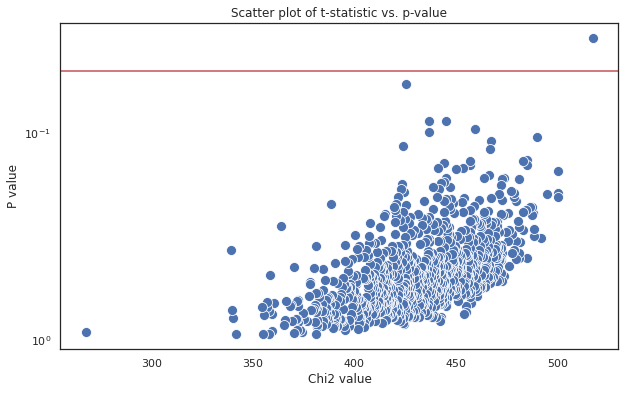

In [10]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Chi2 value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.savefig(f'SIDER_fractions_chisquare_comparison.png', bbox_inches='tight')
plt.show()
           

In [12]:
results_df[results_df["P value"]<0.05]

,Label,Proportion,Chi2 value,P value
775,203464_s_at,-0.000871,517.629749,0.03473
